In [141]:
import pandas as pd
import numpy as np

## Предобработка и создание новых прихнаков

Сначала удалим все вакансии, для которых ключевые навыки не спарсились, они не несут никакой информации

In [142]:
df = pd.read_json('hh_data.json')
df_cleaned = df[df['skills'].apply(lambda x: x != [])]
df_cleaned.shape

(1302, 3)

Таким образом у нас осталось 1302 вакансии Администратора в Москве

In [143]:
df_cleaned.head(20)

,name,salary,skills
0,Администратор стоматологической клиники,от 60000 ₽ на руки,"[Грамотная речь, Деловое общение, Работа с орг..."
2,Администратор компьютерного клуба,от 35000 до 38000 ₽ на руки,[Организаторские навыки]
3,Администратор фитнес-клуба,от 70000 ₽ на руки,"[Пунктуальность, Обучение и развитие, Фитнес, ..."
4,Администратор фитнес-клуба,от 80000 до 120000 ₽ на руки,"[Грамотная речь, Работа в команде, Навыки прод..."
6,Администратор в школу танцев,до 100000 ₽ на руки,"[Грамотная речь, Организаторские навыки, Телеф..."
7,Администратор по работе с клиентами в школу та...,от 80000 до 200000 ₽ на руки,"[B2C продажи, Деловое общение, Развитие продаж..."
8,Администратор (ЕЖЕНЕДЕЛЬНЫЕ ВЫПЛАТЫ),от 60000 до 90000 ₽ на руки,"[Активные продажи, Прямые продажи, Телефонные ..."
9,Администратор гостиницы,от 100000 до 130000 ₽ на руки,"[Работа с жалобами клиентов, Мотивация персона..."
10,Администратор косметологической клиники,от 90000 до 150000 ₽ до вычета налогов,"[Коммуникативные навыки, Администрирование, Вн..."
11,Администратор в стоматологию,от 85000 до 150000 ₽ на руки,"[Активные продажи, Деловая переписка, Организа..."


Как видно з/п указано не в числовом формате (стоит отметить, что какую-то предобработку этого столбца я делал в самом парсинге). Будем считать, что если не указано "на руки" или "после вычета налогов", то это з/п до вычета, а также что если указан интервал з/п, то претендент может рассчитывать на среднюю вилку. Также, чтобы не терять выборку, з/п можно заполнить средним значением, если она не спарсилась (это будет относительно честно, учитывая небольшой разброс з/п администраторов)

In [144]:
df_cleaned['salary'].dtype

dtype('O')

In [145]:
def corrected_salary(salary: str):
    salary = salary.replace(',', '')
    salary_list = list(salary.split(' '))
    ans = 0
    if 'от' in salary_list and 'до' in salary_list:
        l = 0
        r = 0
        cnt_digit = 0
        for i in salary_list:
            if cnt_digit == 2:
                break
            elif cnt_digit == 1:
                if i.isdigit(): 
                    l = i
                    cnt_digit += 1
            else:
                if i.isdigit(): 
                    r = i
                    cnt_digit += 1
        ans = (int(l)+int(r))/2
    else:
        for i in salary_list:
            if i.isdigit():
                ans = int(i)
                break
    if 'на руки' in salary or 'до вычета налогов' in salary: return ans
    else: return ans*0.87

df_cleaned['salary'] = df_cleaned['salary'].map(corrected_salary, na_action='ignore')
df_cleaned.head()

C:\Users\m.glazman\AppData\Local\Temp\ipykernel_13292\3450513244.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['salary'] = df_cleaned['salary'].map(corrected_salary, na_action='ignore')


,name,salary,skills
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг..."
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки]
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ..."
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод..."
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф..."


In [146]:
df_cleaned['salary'].dtype

dtype('float64')

Тепперь з/п представлена в удобном для работы формате, осталось проверить, что нет строк, где salary не спарсилось

In [147]:
df_cleaned.isnull().sum()

name      0
salary    0
skills    0
dtype: int64

Получается, когда мы убрали вакансии, где не спарсились скиллы, вакансий где не спарсилась з/п не осталось

Мне в любом случае пригодится еще один столбец с количество навыков, требуемых в вакансии + есть гипотеза, что чем больше требуется навыков, тем выше указана з/п на вакансии, поэтому ее я создаем еще до визуализаций.

In [148]:
df_cleaned['cnt_skills'] = df_cleaned['skills'].apply(len)
print(f"В среднем в вакансии указано: {np.mean(df_cleaned['cnt_skills'])} ключевых навыков")

В среднем в вакансии указано: 7.6513056835637485 ключевых навыков


C:\Users\m.glazman\AppData\Local\Temp\ipykernel_13292\2606492369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cnt_skills'] = df_cleaned['skills'].apply(len)


Посмотрим, сколько вообще возможных навыков может требоваться для вакансии. Используем для этого One-Hot-Encoding

In [149]:
from sklearn.preprocessing import MultiLabelBinarizer

In [150]:
mlb = MultiLabelBinarizer()
df_skills = pd.DataFrame(mlb.fit_transform(df_cleaned['skills']), columns=mlb.classes_, index=df_cleaned.index)

In [151]:
df_encoded = pd.concat([df_cleaned, df_skills], axis=1)
df_encoded.head()

,name,salary,skills,cnt_skills,1C,1C: Бухгалтерия,1C: Предприятие,1С,1С Фитнесс,1С-Битрикс,...,умение работать в команде,умение работать в режиме многозадачности,умение работать в условиях многозадачности,управляющий,фитнесклуб,харизма,хозяйственность,частичная занятость,энергичность,юниверс
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг...",13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф...",8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
df_encoded[df_encoded.columns[4:]].astype(np.float64)
df_encoded.head()

,name,salary,skills,cnt_skills,1C,1C: Бухгалтерия,1C: Предприятие,1С,1С Фитнесс,1С-Битрикс,...,умение работать в команде,умение работать в режиме многозадачности,умение работать в условиях многозадачности,управляющий,фитнесклуб,харизма,хозяйственность,частичная занятость,энергичность,юниверс
0,Администратор стоматологической клиники,60000.0,"[Грамотная речь, Деловое общение, Работа с орг...",13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Администратор компьютерного клуба,36500.0,[Организаторские навыки],1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Администратор фитнес-клуба,70000.0,"[Пунктуальность, Обучение и развитие, Фитнес, ...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Администратор фитнес-клуба,100000.0,"[Грамотная речь, Работа в команде, Навыки прод...",5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Администратор в школу танцев,100000.0,"[Грамотная речь, Организаторские навыки, Телеф...",8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA

Сразу интересно посмотреть на то, для скольких вакансий нужен каждый скилл (составить представление о популярности навыков, т.к. навыков больше, чем я думал). 

In [153]:
skills_dict = {}
#бежим по всем колонкам после колонки cnt_skills (после нее как раз идут конкретные навыки)
for column in df_encoded.columns[4:]:
    cnt = df_encoded[column].sum()
    skills_dict[column] = cnt   

skills_dict = dict(sorted(skills_dict.items(), key = lambda x: x[1], reverse = True))
skills_dict

{'Грамотная речь': 528,
 'Работа в команде': 426,
 'Деловое общение': 401,
 'Пользователь ПК': 373,
 'Организаторские навыки': 295,
 'Телефонные переговоры': 291,
 'Администрирование': 280,
 'Навыки продаж': 238,
 'Навыки межличностного общения': 203,
 'Прием посетителей': 197,
 'Клиентоориентированность': 178,
 'Деловая переписка': 168,
 'Активные продажи': 164,
 'Работа с оргтехникой': 143,
 'Ориентация на клиента': 135,
 'Работа с большим объемом информации': 127,
 'Деловая коммуникация': 122,
 'Обучение и развитие': 108,
 'Грамотность': 101,
 'Кассовые операции': 101,
 'Работа с кассой': 98,
 'Обеспечение жизнедеятельности офиса': 95,
 'Умение работать в команде': 94,
 'Документооборот': 92,
 'Ответственность': 85,
 'Точность и внимательность к деталям': 85,
 'Деловая этика': 83,
 'Коммуникабельность': 82,
 'Консультирование клиентов по телефону': 77,
 'Стрессоустойчивость': 76,
 'Прямые продажи': 71,
 'Умение работать в коллективе': 71,
 'Деловой этикет': 70,
 'Консультирование кл

Этот список уже отвечает на много вопросов, например: какие навыки нужно развивать для данной профессии в целом. Однако, этот словарь никак не использует для приоритизации навыков основной бенчмарк для выбора работы - з/п, но хорошо отражает вероятность устроиться с одним конкретным навыком на работу в принципе.

Построим распределение зарплаты для вакансий Администратора и сразу посмотрим выбросы на ящике с усами

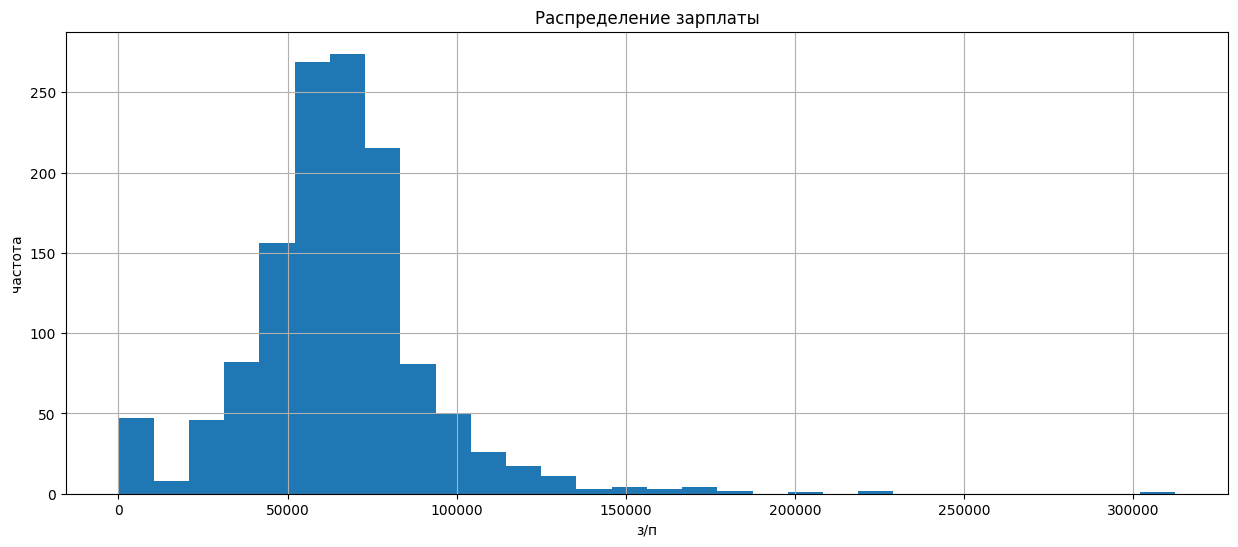

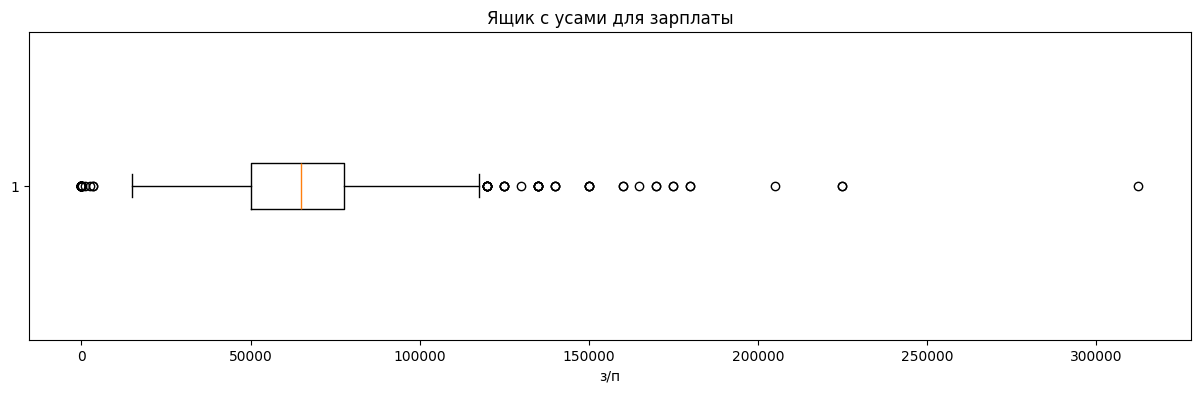

In [154]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(15, 6))
df_encoded['salary'].hist(bins=30, ax=ax1)
ax1.set_title('Распределение зарплаты')
ax1.set_xlabel('з/п')
ax1.set_ylabel('частота')
fig, ax2 = plt.subplots(figsize=(15, 4))
ax2.boxplot(df_encoded['salary'], vert=False)
ax2.set_title('Ящик с усами для зарплаты')
ax2.set_xlabel('з/п')
plt.show()

Найдем выбросы

In [155]:
df_encoded["salary"].describe()
Q1 = df_encoded["salary"].quantile(0.25)
Q3 = df_encoded["salary"].quantile(0.75)
IQR = Q3 - Q1
max_total_m = Q3 + 1.5*IQR
min_total_m = Q1 - 1.5*IQR
print(max_total_m, min_total_m)

118750.0 8750.0


Очистим датасет от выбросов (з/п > 120000). Есть предположение, что для таких вакансий есть какой-то отдельный набор наывыков и обязанностей. Также удалим выбросы около 0 (скорее всего там з/п просто некорректно указано)

In [156]:
df_encoded['salary'] = df_encoded['salary'].astype(float)
df_encoded = df_encoded.loc[(df_encoded['salary'] <= max_total_m) & (df_encoded['salary'] >= min_total_m)]

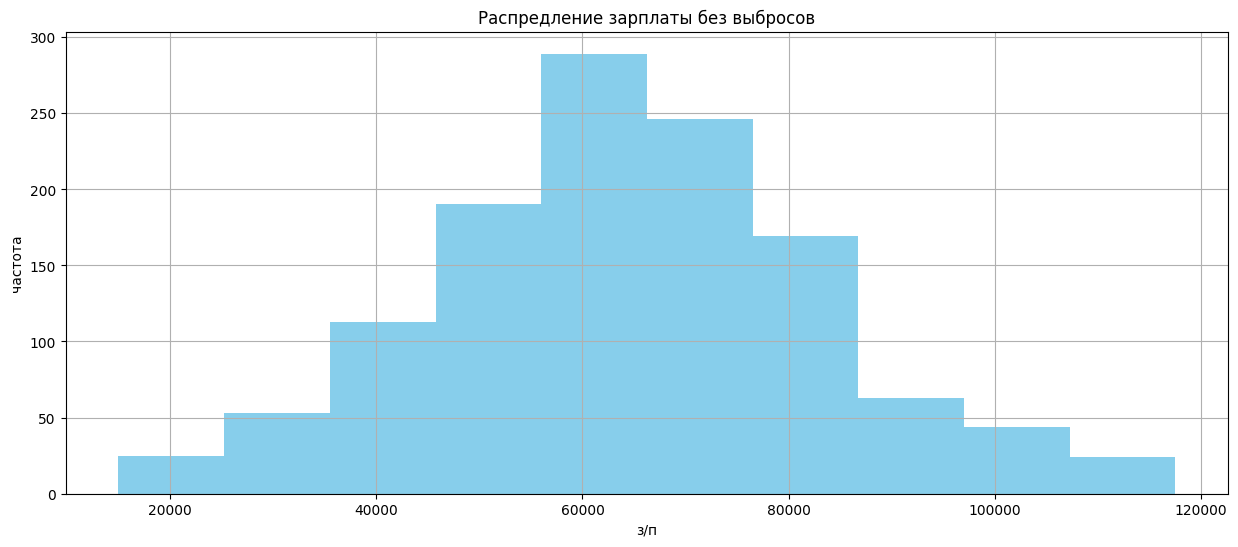

In [157]:
plt.figure(figsize = (15, 6))
df_encoded['salary'].hist(bins = 10, color = 'skyblue')
plt.title('Распредление зарплаты без выбросов')
plt.xlabel('з/п')
plt.ylabel('частота')
plt.show()

Создадим список 10 самых популярных навыков и проверим будет ли отличаться распределение з/п для вакансий, где они присутствуют

In [158]:
top_skills = []
for i, j in skills_dict.items():
    if (len(top_skills) < 10) : top_skills.append(i)
    else: break

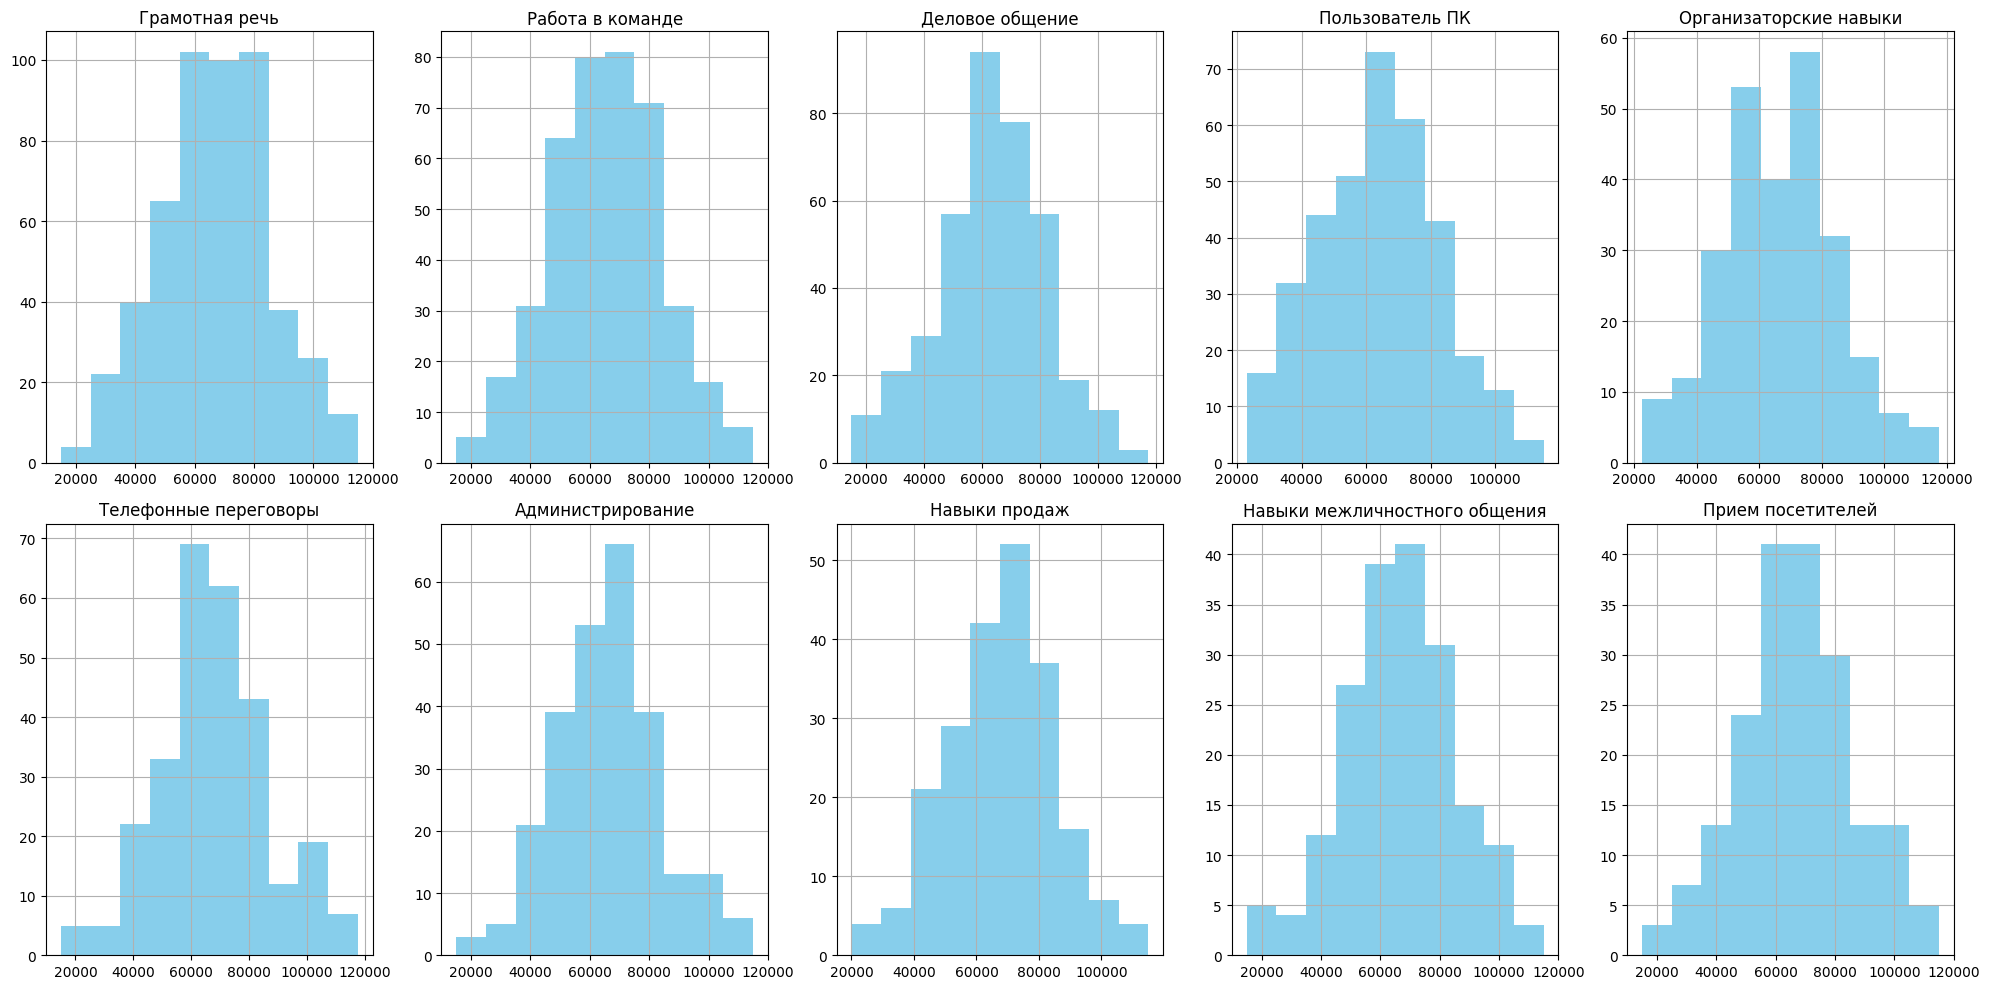

In [159]:
import matplotlib.pyplot as plt

#хочу чтобы гистограммы были на 2 строках и их было удобнее сравнивать
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, skill in enumerate(top_skills):
    #номер строки и столбца для диаграммы
    row = i // 5 
    col = i % 5
    #создаем df где будут только вакансии, для которых нужен выбранный скилл
    df_plt = df_encoded.loc[df_encoded[skill] == 1]
    #рисуем для него распределение
    df_plt['salary'].hist(bins=10, color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(skill)
    
plt.tight_layout()
plt.show()

Наше предположение не оправдалось, вакансии с использованием популярных навыков имеют примерно такое же распределение з/п как и выборка всех вакансий Администратора (популярные признаки не отражают разницу в з/п). При этом несмотря на сужение выборки распределение з/п остается похожим на нормальное

Теперь проверим зависимость количества навыков в вакансии и з/п, есть гипотеза о положительной корреляции

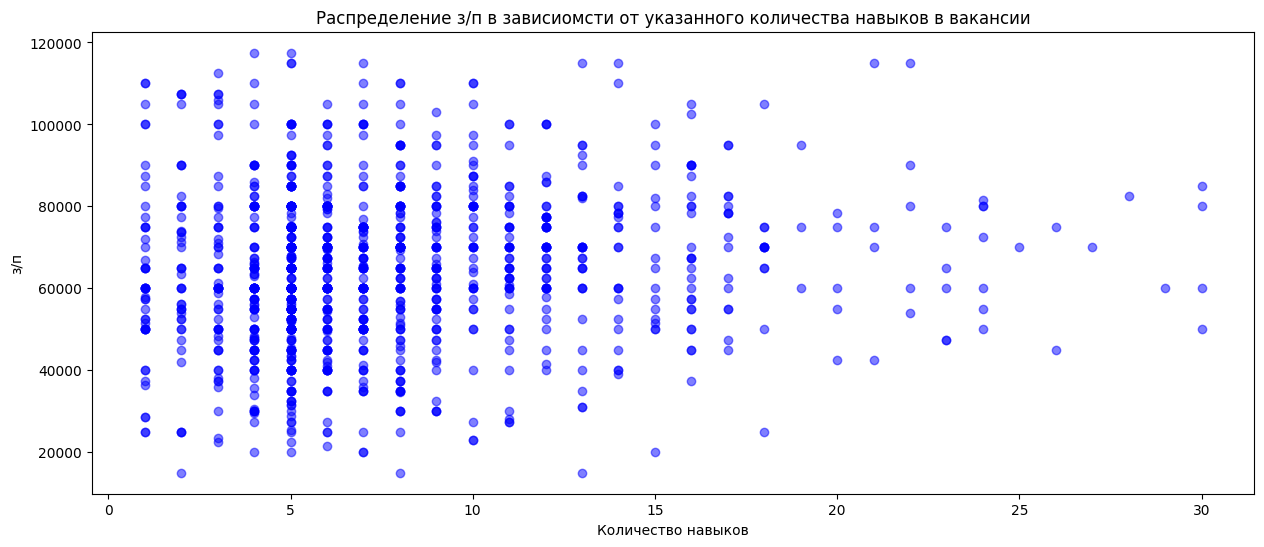

In [160]:
plt.figure(figsize= (15,6))
plt.scatter(df_encoded['cnt_skills'], df_encoded['salary'], color = 'blue', alpha = 0.5)
plt.title('Распределение з/п в зависиомсти от указанного количества навыков в вакансии')
plt.xlabel('Количество навыков')
plt.ylabel('з/п')
plt.show()

Для большей наглядности используем гекасгональную диаграмму. Видно, что значения расположены достаточно плотно друг к другу, что усложняет анализ (не можем точно сказать где лежит большая часть выборки)

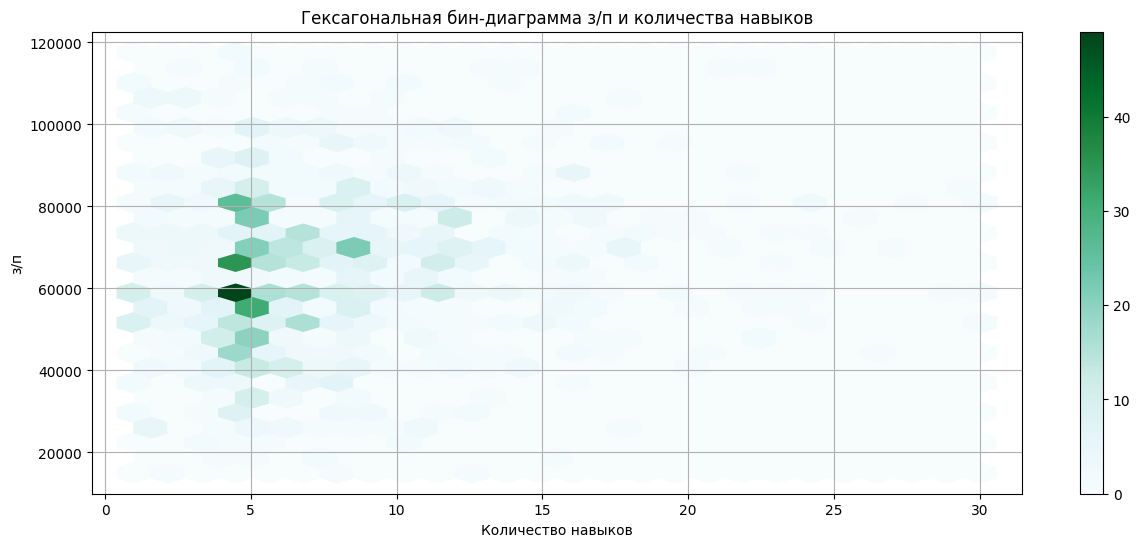

In [161]:
df_encoded.plot(x = 'cnt_skills', y = 'salary', kind = 'hexbin', gridsize = 25, figsize = (15, 6), sharex = False, grid = True)
plt.xlabel('Количество навыков')
plt.ylabel('з/п')
plt.title('Гексагональная бин-диаграмма з/п и количества навыков')
plt.show()

Из распределения видно, что связь между обьектами достаточно слабая. Также мы видим что наибольшее количество вакансий имеют 5 навыков и з/п около 60000

Также есть вероятность что администраторы разных учреждений по разному получают. Давайте проверим и этот признак

In [162]:
df_encoded['name'].nunique()
name_dict = dict()
for i in df_encoded['name']:
    if i in name_dict: name_dict[i] += 1
    else: name_dict[i] = 1
name_dict = dict(sorted(name_dict.items(), key = lambda x: x[1], reverse = True))
name_dict

{'Администратор': 222,
 'Администратор салона красоты': 102,
 'Администратор стоматологической клиники': 41,
 'Администратор медицинского центра': 22,
 'Администратор клиники': 21,
 'Администратор-кассир': 17,
 'Администратор фитнес-клуба': 13,
 'Администратор в салон красоты': 13,
 'Администратор гостиницы': 12,
 'Менеджер-администратор': 12,
 'Старший администратор': 11,
 'Администратор в стоматологию': 9,
 'Администратор отеля': 9,
 'Администратор в офис': 8,
 'Администратор стоматологии': 8,
 'Администратор ресепшен': 7,
 'Администратор офиса': 7,
 'Администратор в стоматологическую клинику': 6,
 'Администратор на ресепшен': 6,
 'Администратор медицинской клиники': 5,
 'Администратор в клинику': 5,
 'Администратор студии маникюра': 5,
 'Администратор салона': 5,
 'Администратор магазина': 5,
 'Администратор косметологической клиники': 4,
 'Администратор в медицинский центр': 4,
 'Администратор фитнес-центра': 4,
 'Кассир-администратор': 4,
 'Администратор барбершопа': 4,
 'Админист

Сделаем аналогично скиллам - построим распределение з/п топ-10 видов администраторов

In [163]:
top_names = []
for i, j in name_dict.items():
    if (len(top_names) < 10) : top_names.append(i)
    else: break

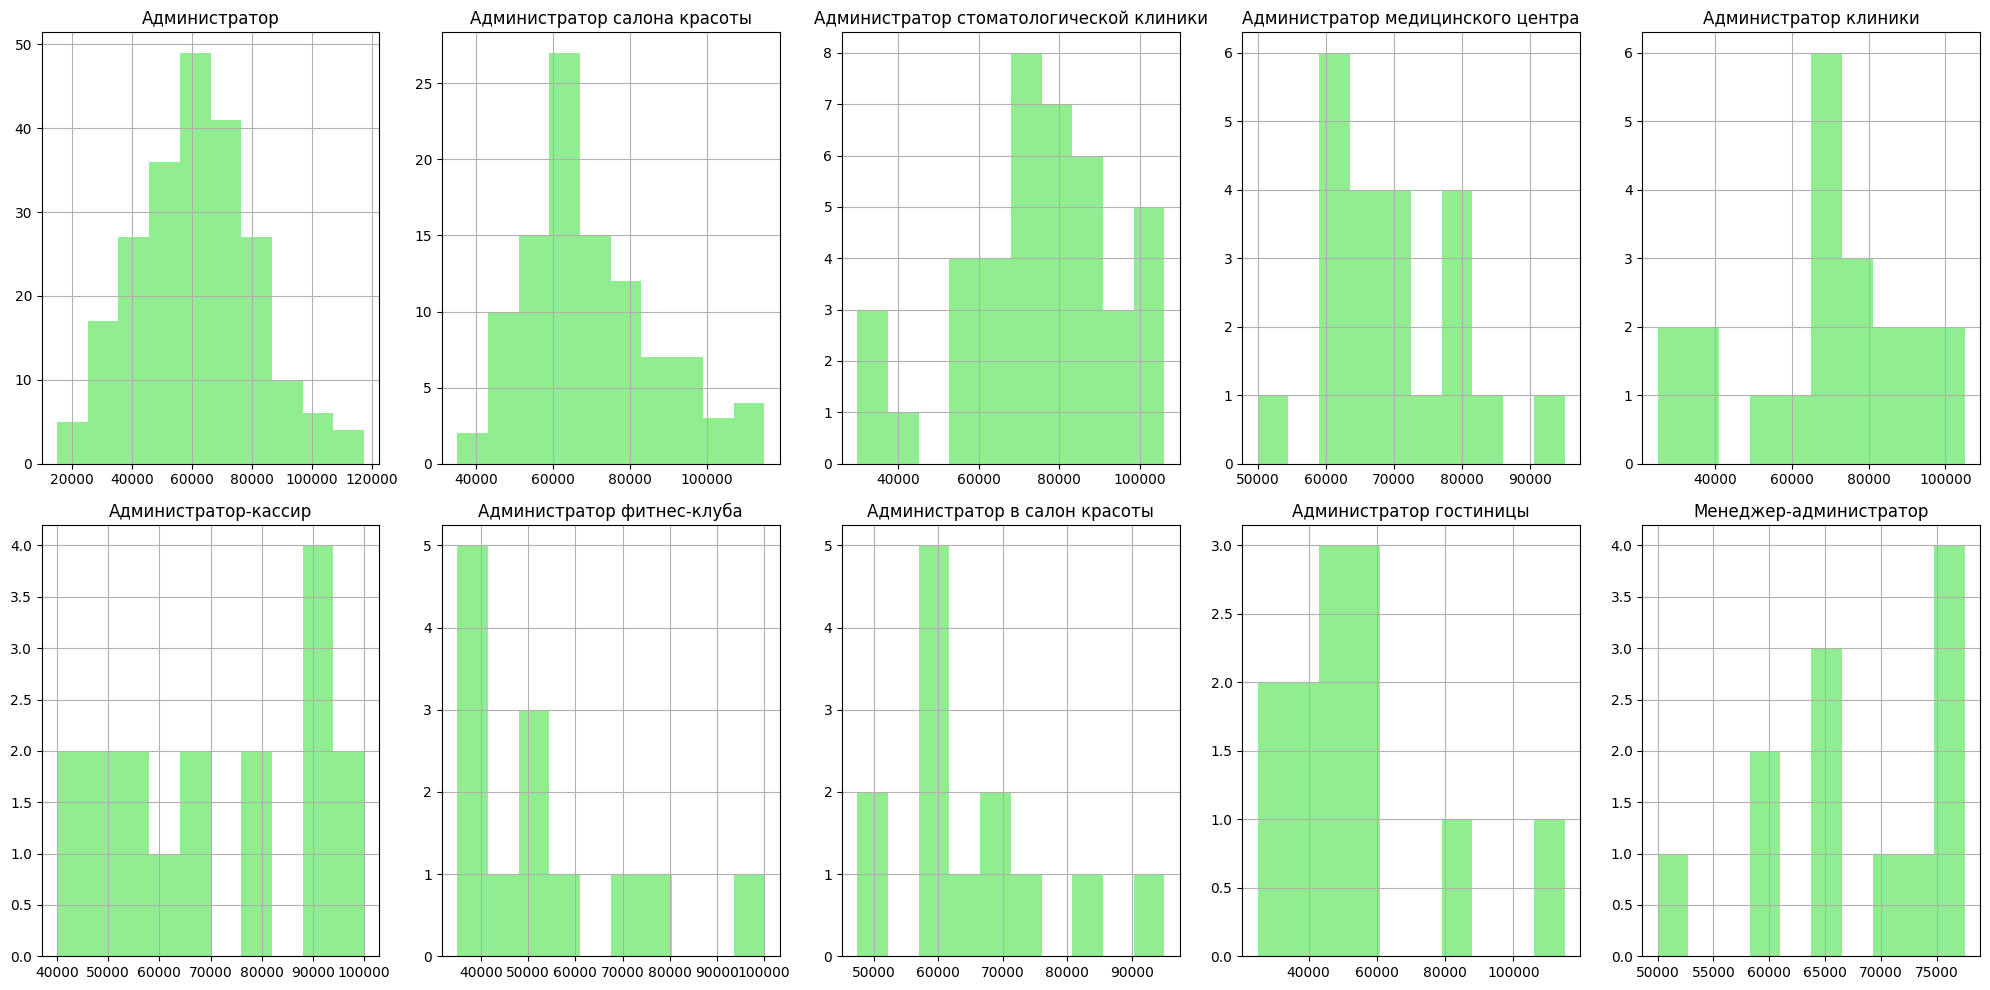

In [164]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, name in enumerate(top_names):
    row = i // 5 
    col = i % 5
    #создаем df где будут только вакансии c нужным названием
    df_plt = df_encoded.loc[df_encoded['name'] == name]
    #рисуем для него распределение
    df_plt['salary'].hist(bins=10, color='lightgreen', ax=axes[row, col])
    axes[row, col].set_title(name)
    
plt.tight_layout()
plt.show()

Из распределений видно, что разные администраторы имеют примерно одну моду з/п 60-70к. При этом выбиваются только распределения з/п Менеджеров-администраторов и Администраторов-кассиров. Это происходит скорее всего из-за того, что у них есть дополнительный функции. Однако это скорее интересное наблюдение, чем что-то что может пригодится для прогнозирования з/п. Тут скорее нужно было убедиться в однородности вакансий.

Из графика видно, что строгой зависимости или корреляции между признаком и целевой переменной нет. Если обучать на этом признаке линейную регрессию то скорее всего он просто будет выдавать вершину распределение з/п - такая модель будет не очень информативна

## Проверка гипотез

In [165]:
import scipy.stats as stats

Итак вовремя визуализации я выдвигал множество предположений и проверял их с помощью визуализаций и фразы "на графике видно, что...". Можно проверить их математически.

#### Посчитаем коэффициент корреляции между нашей новой перемнной и целевой переменной

In [166]:
df_encoded["salary"].corr(df_encoded["cnt_skills"])

0.11399753128586405

Коэффициент корреляции показывеет, что слабая положительная связь между переменными все таки существует

#### Проверим с помощью t-testа правда ли средняя з/п равна 70000, как я говорил ранее из распределений. 

Распределение з/п похоже на нормальное, так что можно использовать ttest. Возьмем уровень значимости 5%

In [167]:
stats.ttest_1samp(df_encoded['salary'], popmean = 70000)

TtestResult(statistic=-10.09314466159016, pvalue=4.6624189422746933e-23, df=1215)

Нет, pvalue < alpha => нулевая гипотеза отвергается и средняя з/п не равна 70000 (на самом деле она меньше)

In [168]:
stats.ttest_1samp(df_encoded['salary'], popmean = 65000)

TtestResult(statistic=-0.7001583014516571, pvalue=0.48396248893166727, df=1215)

Для 65к нулевая гипотеза не отвеграется => средняя з/п правда около 65000

3. Правда ли з/п распределена нормально?

In [169]:
# Тест Д'Агостино-Пирсона
if stats.normaltest(df_encoded["salary"])[1] <= 0.05:
    print("Распределение не похоже на нормальное")
else: 
    print("Распределение похоже на нормальное")

Распределение похоже на нормальное


#### Проверим по критерию Мана-Уитни правда ли распределения з/п топ-3 самых встречающихся вакансий (Администратор, Администратор салона красоты и администратор стоматологической клиники) не отличаются от генеральной совокупности (по медиане). 

По распределениям видно, что распределение з/п Администраторов стоматологической клиники совсем не похоже на нормальное, так что тут ttest использовать не рискну.

In [193]:
from scipy.stats import mannwhitneyu
names = ["Администратор", "Администратор салона красоты", "Администратор стоматологической клиники"]
df_all = df_encoded["salary"]
alpha = 0.05
for i in names:
    df_test = df_encoded[df_encoded["name"] == i]["salary"]
    statistic, pvalue = mannwhitneyu(df_all, df_test, alternative='two-sided')
    if pvalue <= 0.05:
        ans = "Отвергаем нулевую гипотезу: медианы выборок различаются."
    else:
        ans = "Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы."
    print(f'Результаты теста для вакансий "{i}"', end = ': ')
    print(ans)

Результаты теста для вакансий "Администратор": Отвергаем нулевую гипотезу: медианы выборок различаются.
Результаты теста для вакансий "Администратор салона красоты": Отвергаем нулевую гипотезу: медианы выборок различаются.
Результаты теста для вакансий "Администратор стоматологической клиники": Отвергаем нулевую гипотезу: медианы выборок различаются.


Однако если в каждом случае вероятность ошибиться была равна 5%, то вероятность ошибиться хотя бы в одном из тестов = $1 - 0.95^3$, а это уже намного больше. Тогда нам нужно подобрать такую a, чтобы вероятность ошибиться хотя бы в одном из тестов была 5%.

In [171]:
x = (1 - 0.05)**(1/3)
alpha = 1 - x
alpha

0.016952427508441503

Теперь проверим для такого `a`

In [194]:
for i in names:
    df_test = df_encoded[df_encoded["name"] == i]["salary"]
    statistic, pvalue = mannwhitneyu(df_all, df_test, alternative='two-sided')
    if pvalue <= 0.05:
        ans = "Отвергаем нулевую гипотезу: медианы выборок различаются."
    else:
        ans = "Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы."
    print(f'Результаты теста для вакансий "{i}"', end = ': ')
    print(ans)

Результаты теста для вакансий "Администратор": Отвергаем нулевую гипотезу: медианы выборок различаются.
Результаты теста для вакансий "Администратор салона красоты": Отвергаем нулевую гипотезу: медианы выборок различаются.
Результаты теста для вакансий "Администратор стоматологической клиники": Отвергаем нулевую гипотезу: медианы выборок различаются.


Таким образом не всегда можно сказать наверняка похожи ли выборки/их средние исходя только из распределения (с точностью 5% мои выводы для всех этих распределений были неверны)

#### Проделаем то же самое для популярных признаков

In [196]:
df_all = df_encoded["salary"]
x = (1 - 0.05)**(1/10)
alpha = 1 - x
for i in top_skills:
    df_test = df_encoded[df_encoded[i] > 0]["salary"]
    statistic, pvalue = mannwhitneyu(df_all, df_test, alternative='two-sided')
    if pvalue <= 0.05:
        ans = "Отвергаем нулевую гипотезу: медианы выборок различаются."
    else:
        ans = "Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы."
    print(f'Навык "{i}"', end = ': ')
    print(ans)

Навык "Грамотная речь": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Работа в команде": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Деловое общение": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Пользователь ПК": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Организаторские навыки": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Телефонные переговоры": Отвергаем нулевую гипотезу: медианы выборок различаются.
Навык "Администрирование": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Навыки продаж": Отвергаем нулевую гипотезу: медианы выборок различаются.
Навык "Навыки межличностного общения": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.
Навык "Прием посетителей": Не отвергаем нулевую гипотезу: медианы значения выборок одинаковы.


В этом случае отличаются лишь для выборок навыков продаж и умением вести телефонные переговоры медианы отличаются (только для них смогли отвергнуть нулевую гипотезу)

## Начинаем предсказывать з/п

In [174]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [175]:
np.random.seed(42)
X = df_encoded.iloc[:, 3:]
y = df_encoded["salary"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [176]:
np.random.seed(42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [177]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

In [178]:
print(f'MSE: {mse(y_test, y_pred)}')
print(f'MAE: {mae(y_test, y_pred)}')
print(f'R2: {r2(y_test, y_pred)}')

MSE: 7.270101008786908e+27
MAE: 15957905054603.59
R2: -2.029050842008501e+19


Как видно, mse и mae получились просто огромными и данная модель работает хуже, чем просто выдавать для всех обьектов среднюю з/п. Почему так могло получиться?

In [179]:
lr.coef_

array([ 9.71866826e+10, -1.26940146e+15, -2.53127059e+14, -9.71867317e+10,
       -4.46958196e+14, -1.14796916e+15, -9.71866716e+10,  2.52932686e+14,
       -5.08371958e+14, -2.01801422e+14, -9.71866899e+10,  5.43031759e+13,
        2.99457920e+13, -5.21740000e+13, -9.71866501e+10,  9.68921989e+13,
       -4.18658069e+14, -7.24539221e+14,  6.76346944e+13, -9.71866968e+10,
       -9.71866797e+10,  1.73606950e+14,  1.67984002e+14,  1.85980622e+14,
        3.17066250e+13, -9.71866654e+10, -8.74600778e+13,  2.14508680e+14,
       -9.71866936e+10, -9.71866907e+10, -9.71867320e+10,  3.94895474e+14,
       -1.69171698e+14, -9.71866974e+10, -9.71866904e+10, -9.71866562e+10,
       -9.71866300e+10, -4.22733165e+13, -9.71867354e+10, -9.71866854e+10,
       -3.07162586e+13, -9.71866958e+10, -3.14186557e+13, -9.71866753e+10,
       -7.24430948e+12, -2.61674048e+13, -1.88472028e+13, -9.71866635e+10,
        5.95186416e+13, -9.71866536e+10, -9.71866795e+10, -9.71866780e+10,
       -1.39266623e+13,  

По размеру коэффициентов видно, что модель сильно переобучилась, это обусловлено двумя факторами:
1. Очень много коррелированных признаков, которые не стоит отдельно учитывать
2. Очень много признаков, которые нужны для малого количество вакансий (например, указанные только в одной вакансии признаки попадут только в test или только в train)

Давайте это исправлять 

In [180]:
one_skill = []
for i in skills_dict:
    if(skills_dict[i] <= 2): one_skill.append(i)
df_new = df_encoded.drop(columns = one_skill)

In [181]:
print("Количество признаков было равно:", df_encoded.shape[1] - 2)
print("Количество признаков стало равно:", df_new.shape[1] - 2)

Количество признаков было равно: 789
Количество признаков стало равно: 310


In [182]:
df_new = df_new[df_new.iloc[:, 4:].sum(axis = 1) > 0]

In [183]:
print ("Убрав эти признаки мы потеряли:", df_encoded.shape[0] - df_new.shape[0], "вакансий")

Убрав эти признаки мы потеряли: 12 вакансий


Таким образом убрав этии признаки мы потреяли только 12 вакансий, а размерность сократили в 2.5 раза. Теперь используем Lasso и Ridge регулризацию.

In [184]:
np.random.seed(42)
X = df_new.iloc[:, 3:]
y = df_new["salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [185]:
from sklearn.linear_model import Lasso, Ridge
np.random.seed(42)
a = [0.1, 1, 5, 10, 20, 30, 50, 100]
best_mse = 999999999999999999
best_type = ''
best_a = 0
for i in a:
    lasso = Lasso(alpha = i)
    ridge = Ridge(alpha = i)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_val)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_val)
    print(f'Для a = {i}:')
    print(f'MSE для Lasso регрессии {mse(y_val, y_pred_lasso)}')
    print(f'MAE для Lasso регрессии {mae(y_val, y_pred_lasso)}')
    print(f'MSE для Ridge регрессии {mse(y_val, y_pred_ridge)}')
    print(f'MAE для Ridge регрессии {mae(y_val, y_pred_ridge)}')
    our_mse = min(mse(y_val, y_pred_lasso), mse(y_val, y_pred_ridge))
    if our_mse < best_mse:
        best_mse = our_mse 
        best_a = i
        if our_mse == mse(y_val, y_pred_lasso):
            best_type = 'Lasso'
        else:
            best_type = 'Ridge'

Для a = 0.1:
MSE для Lasso регрессии 893853832.7750895
MAE для Lasso регрессии 19249.524079132854
MSE для Ridge регрессии 439266834.8855794
MAE для Ridge регрессии 15692.205814397326


c:\Python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.224e+08, tolerance: 2.031e+07
  model = cd_fast.enet_coordinate_descent(


Для a = 1:
MSE для Lasso регрессии 626679471.866038
MAE для Lasso регрессии 17508.34843740465
MSE для Ridge регрессии 335854471.8423287
MAE для Ridge регрессии 14143.078159862334
Для a = 5:
MSE для Lasso регрессии 414420495.90824175
MAE для Lasso регрессии 15328.367094643785
MSE для Ridge регрессии 300005691.38089895
MAE для Ridge регрессии 13257.867137927524
Для a = 10:
MSE для Lasso регрессии 375828337.02703637
MAE для Lasso регрессии 14861.449241482454
MSE для Ridge регрессии 293038141.70203424
MAE для Ridge регрессии 13133.40906633515
Для a = 20:
MSE для Lasso регрессии 343354507.47055554
MAE для Lasso регрессии 14205.613342144483
MSE для Ridge регрессии 289853591.87430763
MAE для Ridge регрессии 13039.449102963565
Для a = 30:
MSE для Lasso регрессии 327407994.6494538
MAE для Lasso регрессии 13862.04909111873
MSE для Ridge регрессии 289330095.13643146
MAE для Ridge регрессии 13032.273649942354
Для a = 50:
MSE для Lasso регрессии 304682791.9951908
MAE для Lasso регрессии 13468.24577

In [186]:
best_type, best_a

('Ridge', 30)

Итак, лучше всего на новом датасете себя показала Ridge регуляризация с a = 30

P.S. линейная регрессия в scikit-learn работает через минимизацию mse (в данном случае оптимально, т.к. от выбросов данные я очищал). MAE вывожу просто для того, чтобы результаты были интерпретируемыми

Теперь замеряем качество и сравним с обычной Линейной регрессией

In [187]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

ridge = Ridge(alpha = 30)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print(f'MSE для обычной регрессии {mse(y_test, y_pred_lr)}')
print(f'MAE для обычной регрессии {mae(y_test, y_pred_lr)}')
print(f'R2 для обычной регрессии {r2(y_test, y_pred_lr)}')
print(f'MSE для Ridge регрессии {mse(y_test, y_pred_ridge)}')
print(f'MAE для Ridge регрессии {mae(y_test, y_pred_ridge)}')
print(f'R2 для Ridge регрессии {r2(y_test, y_pred_ridge)}')

MSE для обычной регрессии 5.660845075135882e+26
MAE для обычной регрессии 2805647522311.8745
R2 для обычной регрессии -1.5972691483931784e+18
MSE для Ridge регрессии 349338247.0214012
MAE для Ridge регрессии 14918.580714504655
R2 для Ridge регрессии 0.014304053697061225


Видно насколько сильно мы уменьшили погрешность, однако несмотря на это наша модель работает не сильно лучше просто вывода среднего по з/п (R2 все еще достаточно низкий). Однако, назкое значение R2 можно обьяснить высокой сложностью данных и слабой зависимостью между обьясняемой переменной и признаками.

Визуализируем результаты нашей регрессии

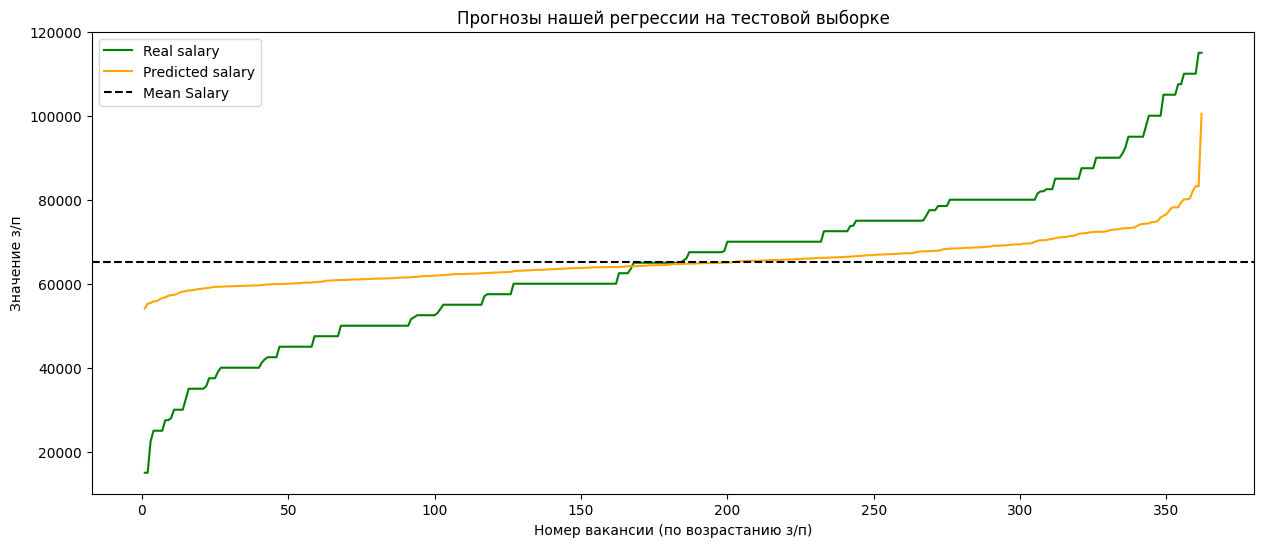

In [188]:
x = np.arange(1, y_test.shape[0]+1)
y_real = y_test.sort_values()
y_predicted = sorted(y_pred_ridge)
mean_salary = np.mean(y_real)
plt.figure(figsize=(15, 6))
plt.plot(x, y_real, color='green', label = 'Real salary')
plt.plot(x, y_predicted, color='orange', label = 'Predicted salary')
plt.axhline(mean_salary, color='black', linestyle='--', label='Mean Salary')
plt.title("Прогнозы нашей регрессии на тестовой выборке")
plt.xlabel("Номер вакансии (по возрастанию з/п)")
plt.ylabel("Значение з/п")
plt.legend()
plt.show()

Кнч это не самый лучший способ визуализации, но 342 мерное пространство не умею рисовать(

In [189]:
ridge_df = pd.DataFrame({
    "feature": X_train.columns,
    "weight": ridge.coef_
})
ridge_df[ridge_df["weight"] != 0]

,feature,weight
0,cnt_skills,347.133917
1,1C: Бухгалтерия,-190.721147
2,1С: Документооборот,775.027464
3,1С: Предприятие 8,-557.893743
5,1С: Салон красоты,-572.367545
...,...,...
303,сервис,-163.334462
304,телефонные продажи,626.492570
305,"умение проявлять внимание, заинтересованность,...",-48.407638
306,умение работать в команде,592.891709


Какие проблемы видны:

1. Модель выдает очень похожие на среднее значение прогнозы. Это скорее всего происходит из-за плохого качества заполняемых вакансий и низкой скоррелированности признаков и обьясняемой переменной (показывал в разделе EDA)

2. На самом деле веса переменных не очень интерпретируемые и сильно подгонаны под рынок (все равно есть переобучение из-за большого количества призаков, несмотря на использование регуляризации). Т.е. по матрице весов нельзя точно получить з/п по твоим скилам, но можно ответить на вопрос: "на сколько я соответствую рынку труда администраторов в данный момент / существующим вакансиям".

3. Некоторые признаки имеют отрицательные веса, но это не значит, что данные навыки ухудшают потенциальную з/п. Это значит, что з/п ниже в тех вакансиях, в которых они вигурируют на hh.ru

На самом деле для таких данных и достаточно абстрактных признаков (почти все признаки - это разного рода soft-skills, которые сложно обьективно оценить) получилось добиться неплохого качества (модель в среднем ошибается меньше чем на 15000 рублей)

Вывод: по результатам проекта можно сказать, что получилось создать модель, способную предсказывать з/п Администраторов по ключевым навыкам, указазнынм в вакансии. Однако, точность модели меньше, чем ожидалось. Это можно обьяснить плохим качеством составления вакансий и довольно субьектвным/абстрактным навыкам, необходимым для администраторов. Возможно для других специальностей, где превалируют hard-skills данная модель и анализ переменных будет более точным.